# Date Fruit classification using SVM

# Dataset link : https://www.muratkoklu.com/datasets/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
date_fruit=pd.read_csv("E:/Data science/python/New folder/Date_Fruit_Datasets.csv")
date_fruit

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [3]:
date_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [4]:
date_fruit.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [5]:
date_fruit.groupby('Class')
date_fruit['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [ ]:
#date_fruit[date_fruit['Class']=='SOGAY']

In [6]:
date_fruit0=date_fruit[0:65]
date_fruit0

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,445290,2435.3889,857.8929,663.8074,0.6335,752.9680,0.9940,448000,0.7515,1.2924,...,4.8948,10.0825,8.1471,-3.574030e+10,-30464757760,-27059025920,44.8647,42.0194,37.8889,BERHI
61,375936,2255.8411,817.8654,589.0416,0.6937,691.8501,0.9945,378008,0.7365,1.3885,...,5.8351,13.1056,12.0114,-1.964956e+10,-21339979776,-19707056128,36.7722,38.8620,36.5344,BERHI
62,439650,2447.7371,890.0155,635.1306,0.7005,748.1843,0.9926,442920,0.7633,1.4013,...,4.0996,8.0819,8.6770,-4.606790e+10,-43327778816,-41025200128,50.2533,49.8476,47.6192,BERHI
63,433338,2423.3010,836.3414,664.9469,0.6065,742.7941,0.9932,436301,0.7560,1.2578,...,3.6208,4.0745,6.1444,-4.857920e+10,-42560143360,-34883911680,52.5610,49.6808,44.5522,BERHI


In [7]:
date_fruit1=date_fruit[65:163]
date_fruit1

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
65,230122,1804.3540,649.0608,454.5320,0.7139,541.2952,0.9883,232846,0.8192,1.4280,...,3.8148,2.9127,3.3667,-4.195948e+10,-37230223360,-36367020032,66.1163,63.2356,62.4892,DEGLET
66,231946,1800.8101,678.9835,436.4881,0.7660,543.4361,0.9922,233763,0.7924,1.5556,...,3.1537,3.5782,3.2341,-2.539127e+10,-23603490816,-28687542272,52.4342,51.0893,55.8778,DEGLET
67,218006,1754.2820,671.6726,414.5850,0.7868,526.8528,0.9930,219532,0.8089,1.6201,...,2.0128,2.3344,4.0136,-2.719713e+10,-21465534464,-22162524160,54.3825,49.5349,51.3752,DEGLET
68,272074,2031.7810,778.5798,446.9384,0.8188,588.5706,0.9823,276985,0.8072,1.7420,...,3.0403,2.5393,2.5903,-4.682732e+10,-45142360064,-33304205312,64.1701,62.9819,54.2980,DEGLET
69,222790,1766.3240,651.6551,436.6493,0.7423,532.6021,0.9932,224312,0.7893,1.4924,...,2.2621,2.1012,2.3364,-3.550325e+10,-32167600128,-28105680896,60.8351,58.4294,55.3596,DEGLET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,192454,1657.2650,622.9678,394.7744,0.7736,495.0152,0.9902,194360,0.8084,1.5780,...,4.5543,9.5935,4.3352,-1.128836e+10,-8877689856,-12270061568,39.4568,35.2681,40.5899,DEGLET
159,212900,1740.3480,651.9711,417.6589,0.7679,520.6464,0.9901,215025,0.7897,1.5610,...,2.0370,2.0001,2.3903,-2.916341e+10,-28835395584,-22648289280,56.5309,56.8858,51.2421,DEGLET
160,177803,1573.6281,605.3248,375.6269,0.7842,475.8002,0.9948,178732,0.8304,1.6115,...,2.7678,2.7131,2.3884,-2.024229e+10,-16355894272,-16392951808,52.8324,48.4186,48.0509,DEGLET
161,226586,1773.1750,662.9202,436.9543,0.7520,537.1204,0.9919,228431,0.8083,1.5171,...,2.4317,3.4604,2.5807,-1.683761e+10,-14030576640,-17969643520,43.4915,40.4844,45.2207,DEGLET


In [8]:
date_fruit2=date_fruit[163:367]
date_fruit2

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
163,138167,1370.2080,498.7525,353.9258,0.7046,419.4278,0.9925,139208,0.7316,1.4092,...,2.5951,3.7693,2.8701,-1.038150e+10,-9775930368,-11240395776,43.0708,42.1130,45.2595,DOKOL
164,138362,1411.1870,525.3536,336.4710,0.7680,419.7237,0.9836,140663,0.7797,1.5614,...,3.6927,3.7615,2.4843,-2.428214e+10,-23951843328,-21570297856,65.0882,65.4412,62.1085,DOKOL
165,160562,1514.4480,570.1646,359.9110,0.7756,452.1436,0.9913,161971,0.7854,1.5842,...,3.1097,2.8883,2.3741,-2.833250e+10,-30146041856,-22212888576,64.7667,67.6564,58.5080,DOKOL
166,208042,1725.8110,649.4158,411.8994,0.7731,514.6721,0.9918,209753,0.7331,1.5766,...,2.2060,2.2021,2.7079,-2.424186e+10,-18904291328,-16004977664,52.3850,46.5880,43.6055,DOKOL
167,143391,1416.6060,544.4253,335.9414,0.7869,427.2834,0.9943,144211,0.7796,1.6206,...,3.1254,2.5324,2.2916,-1.969772e+10,-18499430400,-16122652672,57.7764,56.6723,52.4780,DOKOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,150870,1445.8790,537.6102,358.1697,0.7458,438.2849,0.9904,152327,0.7130,1.5010,...,2.3663,2.2462,2.1154,-2.420585e+10,-24482635776,-22715193344,61.3043,62.4264,60.0458,DOKOL
363,191640,1645.9800,612.0375,401.4839,0.7548,493.9672,0.9910,193385,0.7397,1.5244,...,2.1739,2.1993,1.9490,-4.305270e+10,-39097274368,-26683346944,71.1365,68.4399,57.7803,DOKOL
364,146398,1445.1949,542.8766,344.2591,0.7732,431.7404,0.9890,148022,0.7767,1.5769,...,2.4363,2.8043,2.7680,-1.817319e+10,-15167342592,-15677341696,54.6219,50.3978,51.2863,DOKOL
365,79187,1047.8580,375.3784,269.2061,0.6969,317.5280,0.9885,80108,0.7400,1.3944,...,2.1325,1.9894,1.8957,-1.603851e+10,-14812362752,-14150983680,67.8821,66.0672,64.0849,DOKOL


In [9]:
date_fruit3=date_fruit[367:439]
date_fruit3

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
367,491606,2525.6931,836.6254,750.6882,0.4415,791.1588,0.9952,493956,0.7950,1.1145,...,2.6334,5.3556,3.2644,-3.288173e+10,-37528907776,-40919240704,41.3022,44.3732,45.9070,IRAQI
368,399815,2296.2310,776.2232,658.5235,0.5294,713.4846,0.9924,402885,0.7555,1.1787,...,10.8872,12.2215,7.1924,-1.228379e+10,-16041399296,-18494177280,28.9866,32.1348,33.9988,IRAQI
369,440427,2391.8450,843.0915,665.4988,0.6139,748.8452,0.9967,441904,0.7821,1.2669,...,2.7451,4.1750,4.6311,-2.685110e+10,-27893383168,-23108050944,38.1744,39.3475,35.5653,IRAQI
370,429538,2421.3320,871.1118,631.9023,0.6883,739.5301,0.9934,432406,0.7129,1.3786,...,11.2838,10.8245,7.7619,-1.719769e+10,-22245658624,-24220592128,31.8175,35.9190,36.4468,IRAQI
371,346264,2140.3511,744.2978,594.7831,0.6012,663.9857,0.9927,348820,0.7726,1.2514,...,3.0955,7.2750,3.9270,-1.642946e+10,-17578764288,-17165315072,34.7372,35.9796,34.3479,IRAQI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435528,2430.1211,789.1514,707.8071,0.4422,744.6687,0.9874,441070,0.7605,1.1149,...,3.0590,3.6120,3.5624,-3.482421e+10,-36085436416,-32272959488,44.8404,45.7091,42.8758,IRAQI
435,441826,2486.4771,942.0581,603.1290,0.7682,750.0336,0.9948,444138,0.8075,1.5620,...,7.9695,9.3755,7.3022,-3.633212e+10,-32863416320,-37779701760,43.0456,41.0627,43.2121,IRAQI
436,441779,2426.1641,831.9905,678.0819,0.5794,749.9937,0.9937,444560,0.7586,1.2270,...,2.5742,3.1220,2.8384,-4.041728e+10,-33387563008,-31205566464,47.1099,42.9394,40.3150,IRAQI
437,462347,2516.8679,845.5637,697.9985,0.5644,767.2538,0.9819,470882,0.7725,1.2114,...,3.5119,4.9081,7.6895,-3.577795e+10,-39001317376,-30265178112,42.4112,45.3011,39.8381,IRAQI


In [10]:
date_fruit4=date_fruit[439:605]
date_fruit4

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
439,368069,2297.5349,836.8202,572.0430,0.7299,684.5729,0.9825,374626,0.7085,1.4629,...,2.5352,2.4905,2.9580,-4.350063e+10,-37737820160,-38624436224,53.7853,50.3697,51.3873,ROTANA
440,349184,2214.7261,792.7963,600.6845,0.6526,666.7795,0.9538,366102,0.7218,1.3198,...,2.5060,2.5406,2.3086,-6.150815e+10,-55801462784,-42869469184,64.6368,61.9782,54.7564,ROTANA
441,368900,2398.1880,855.3609,560.0610,0.7558,685.3452,0.9810,376032,0.7036,1.5273,...,2.2269,2.3311,3.2049,-5.533245e+10,-50611847168,-40591462400,60.2399,58.1833,52.9831,ROTANA
442,355024,2242.1531,795.7430,573.1878,0.6936,672.3322,0.9842,360723,0.7325,1.3883,...,2.6563,2.5126,2.8098,-5.055849e+10,-43470987264,-38739263488,58.6531,54.3979,51.9450,ROTANA
443,350266,2210.1680,751.1333,602.6666,0.5969,667.8118,0.9844,355819,0.7469,1.2463,...,2.3207,2.8259,2.5050,-7.154138e+10,-63938854912,-54574940160,69.1982,66.2904,61.5034,ROTANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,403926,2464.7891,843.9724,625.0685,0.6719,717.1433,0.9678,417345,0.7473,1.3502,...,2.9423,2.7913,2.8928,-6.462033e+10,-64315211776,-50441998336,61.9725,62.4023,55.8575,ROTANA
601,350033,2232.9929,801.6467,558.6144,0.7172,667.5896,0.9872,354582,0.7811,1.4351,...,2.9258,2.9342,2.7258,-4.507675e+10,-44132519936,-41153667072,55.8484,55.3751,52.8024,ROTANA
602,362994,2338.2161,834.3950,563.8201,0.7372,679.8370,0.9701,374179,0.7485,1.4799,...,2.8208,2.5208,2.7611,-4.693461e+10,-42761355264,-35653304320,55.8311,53.4965,49.1414,ROTANA
603,468855,2620.2681,918.2051,662.6828,0.6922,772.6349,0.9832,476855,0.7408,1.3856,...,3.4798,3.3067,2.7802,-9.312449e+10,-84190658560,-78581514240,68.8965,66.2911,63.6946,ROTANA


In [11]:
date_fruit5=date_fruit[605:804]
date_fruit5

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
605,329691,2811.9971,899.2563,475.1783,0.8490,647.9009,0.9651,341597,0.8048,1.8925,...,8.5491,8.8791,4.0039,-1.036474e+10,-10194311168,-16526111744,27.5958,27.5094,35.8270,SAFAVI
606,334283,2307.6660,868.3939,492.1340,0.8239,652.3974,0.9803,340999,0.7825,1.7645,...,7.7618,12.1367,3.5067,-8.792924e+09,-9612582912,-13889314816,26.1737,27.4799,33.1552,SAFAVI
607,346537,2315.5601,910.2367,486.0287,0.8455,664.2474,0.9851,351786,0.6474,1.8728,...,6.0069,7.0940,3.4491,-9.585511e+09,-11683753984,-18485772288,26.4261,29.5218,37.4574,SAFAVI
608,345062,2668.8879,944.9453,468.3525,0.8685,662.8322,0.9694,355967,0.6318,2.0176,...,2.4313,2.9895,2.0872,-1.999011e+10,-16136648704,-25802205184,36.3536,32.8508,41.3054,SAFAVI
609,332213,2502.1660,887.0002,480.4225,0.8406,650.3743,0.9675,343374,0.6200,1.8463,...,11.5620,9.9313,3.1435,-7.434829e+09,-7833347584,-11570802688,22.4648,23.5240,29.7132,SAFAVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,333228,2300.6670,856.5320,500.6767,0.8114,651.3671,0.9812,339597,0.6937,1.7107,...,10.1762,11.9589,4.6673,-5.439325e+09,-8345632256,-10900799488,20.2619,25.0872,29.3583,SAFAVI
800,320409,2200.6350,861.2217,477.5822,0.8322,638.7155,0.9749,328674,0.6545,1.8033,...,5.8239,10.2713,3.7002,-5.533850e+09,-7757913600,-11189478400,21.3231,24.8544,30.1380,SAFAVI
801,321312,2204.2451,888.2299,464.3716,0.8525,639.6149,0.9873,325458,0.6595,1.9128,...,3.8051,12.3117,7.2073,-9.751510e+09,-9878406144,-11833720832,28.2489,28.5930,31.7590,SAFAVI
802,340479,2652.9270,998.5767,442.5258,0.8964,658.4158,0.9432,360967,0.5123,2.2565,...,4.9687,5.2824,2.7441,-2.042097e+10,-17921497088,-23097014272,38.3343,36.7280,41.2770,SAFAVI


In [12]:
date_fruit6=date_fruit[804:]
date_fruit6

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
804,272029,1927.4420,700.2120,497.2475,0.7041,588.5220,0.9908,274542,0.8419,1.4082,...,2.4454,2.5487,3.3825,-3.875754e+10,-25822574592,-24730755072,57.2344,47.6648,47.5488,SOGAY
805,328825,2226.3210,845.2898,520.5521,0.7879,647.0494,0.9565,343779,0.7462,1.6238,...,2.6496,2.4092,2.3755,-7.089738e+10,-67259494400,-60814057472,70.8832,69.7959,66.8365,SOGAY
806,378039,2343.2290,902.6270,535.5190,0.8050,693.7825,0.9889,382265,0.7876,1.6855,...,2.2545,3.5794,3.1576,-3.326311e+10,-22413066240,-29248870400,45.6848,38.2546,43.5166,SOGAY
807,324530,2168.5410,805.7068,514.7833,0.7693,642.8098,0.9883,328356,0.7640,1.5651,...,2.4943,2.2799,2.4289,-4.697543e+10,-35978866688,-33972396032,58.7951,50.9915,49.7197,SOGAY
808,332254,2172.4651,829.7610,513.4503,0.7856,650.4144,0.9930,334598,0.7927,1.6160,...,2.3567,1.8934,2.0718,-5.623673e+10,-43204186112,-39882215424,62.3265,54.7204,52.5619,SOGAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


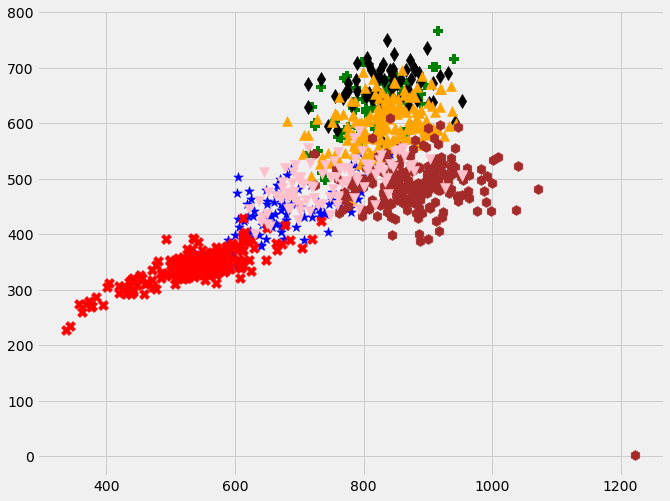

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(date_fruit0['MAJOR_AXIS'],date_fruit0['MINOR_AXIS'],color='green',marker='+',s=100)
plt.scatter(date_fruit1['MAJOR_AXIS'],date_fruit1['MINOR_AXIS'],color='blue',marker='*',s=100)
plt.scatter(date_fruit2['MAJOR_AXIS'],date_fruit2['MINOR_AXIS'],color='red',marker='X',s=100)
plt.scatter(date_fruit3['MAJOR_AXIS'],date_fruit3['MINOR_AXIS'],color='black',marker='d',s=100)
plt.scatter(date_fruit4['MAJOR_AXIS'],date_fruit4['MINOR_AXIS'],color='orange',marker='^',s=100)
plt.scatter(date_fruit5['MAJOR_AXIS'],date_fruit5['MINOR_AXIS'],color='brown',marker='h',s=100)
plt.scatter(date_fruit6['MAJOR_AXIS'],date_fruit6['MINOR_AXIS'],color='pink',marker='v',s=100)

In [14]:
date_fruit.replace(to_replace="BERHI",value=1,inplace=True)
date_fruit.replace(to_replace="DEGLET",value=2,inplace=True)
date_fruit.replace(to_replace="DOKOL",value=3,inplace=True)
date_fruit.replace(to_replace="IRAQI",value=4,inplace=True)
date_fruit.replace(to_replace="ROTANA",value=5,inplace=True)
date_fruit.replace(to_replace="SAFAVI",value=6,inplace=True)
date_fruit.replace(to_replace="SOGAY",value=7,inplace=True)

In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
x=date_fruit.drop(['Class'],axis=1)
y=date_fruit['Class']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

In [18]:
svc = SVC(random_state=100)

In [19]:
svc.fit(x_train,y_train)

SVC(random_state=100)

In [20]:
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.6464968152866242
0.6370370370370371


In [21]:
z=svc.predict(x_test)
z2=svc.predict(x_train)

In [55]:
z

array([3, 6, 6, 4, 5, 6, 3, 5, 6, 5, 5, 6, 5, 4, 6, 2, 6, 7, 3, 6, 5, 3,
       6, 2, 3, 5, 5, 3, 5, 3, 3, 7, 5, 2, 3, 3, 7, 3, 3, 6, 3, 3, 3, 3,
       3, 5, 7, 3, 6, 6, 6, 6, 3, 3, 6, 4, 7, 3, 5, 5, 2, 6, 6, 6, 3, 5,
       5, 6, 6, 5, 5, 5, 6, 3, 6, 3, 6, 6, 6, 3, 3, 6, 7, 3, 3, 6, 6, 5,
       5, 2, 4, 5, 5, 3, 7, 6, 6, 3, 3, 3, 6, 5, 6, 3, 6, 3, 6, 6, 6, 3,
       5, 6, 3, 3, 5, 3, 3, 5, 3, 3, 6, 3, 6, 3, 5, 5, 3, 2, 2, 6, 5, 7,
       6, 3, 5, 5, 6, 6, 6, 2, 2, 3, 5, 6, 6, 5, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 6, 6, 3, 3, 3, 3, 2, 5, 5, 4, 5, 5, 3, 6, 6, 6, 7, 5, 3, 5, 6,
       5, 3, 6, 3, 3, 5, 6, 3, 3, 5, 3, 3, 6, 3, 5, 3, 6, 3, 6, 3, 5, 3,
       4, 5, 5, 3, 3, 5, 5, 3, 3, 5, 7, 7, 6, 5, 3, 3, 3, 4, 5, 6, 3, 3,
       3, 3, 6, 3, 6, 6, 6, 3, 5, 3, 3, 5, 5, 5, 5, 5, 3, 6, 5, 5, 6, 6,
       6, 4, 7, 3, 3, 5, 3, 5, 7, 3, 5, 3, 6, 6, 3, 5, 3, 6, 5, 3, 3, 6,
       5, 3, 3, 2, 3, 3], dtype=int64)

In [22]:
score =accuracy_score(y_test,z)
print(score)
score2 =accuracy_score(y_train,z2)
print(score2)

0.6370370370370371
0.6464968152866242


# Plotting Test set

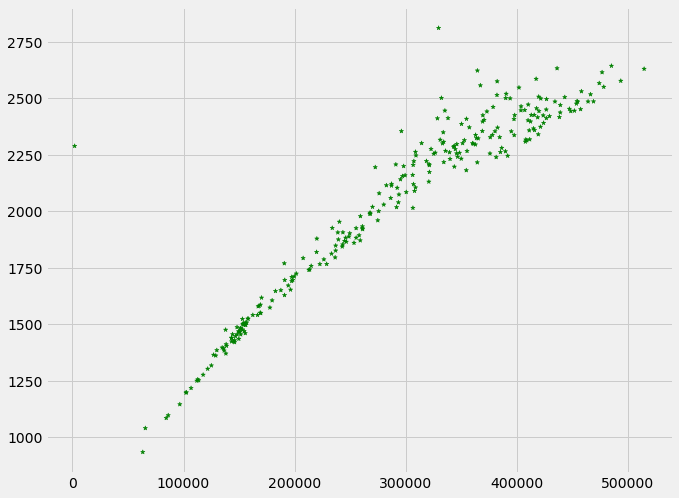

In [52]:
color = ['black' if c == 0 else 'green' for c in z]
plt.figure(figsize=(10,8))
plt.scatter(x_test.iloc[:,0], x_test.iloc[:,1], c=color,s=20,marker='*')

# Plotting train set

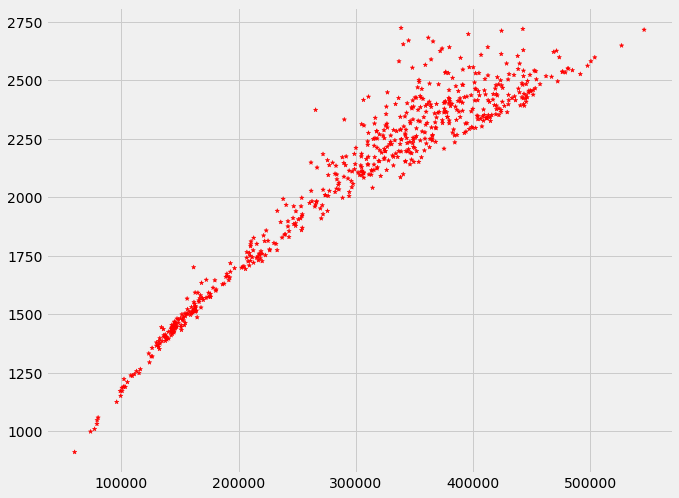

In [56]:
color = ['black' if c == 0 else 'red' for c in z2]
plt.figure(figsize=(10,8))
plt.scatter(x_train.iloc[:,0], x_train.iloc[:,1], c=color,s=20,marker='*')